In [99]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm as vector_norm

def sigmoid(x):
    return 1 / (1 + np.exp(-x * 40))

def sigder(x):
    return sigmoid(x) * (1 - sigmoid(x))

def clf(x):
    return sigmoid(vector_norm(x) - .8)

def grad(x):
    if (vector_norm(x) < 1e-2):
        return np.array([0, 0])
    return .01 * sigder(vector_norm(x) - .8) * np.array(x) / vector_norm(x)

In [111]:
classes = np.zeros((50, 50))
ran50 = np.linspace(0, 1, 50)
ran20 = np.linspace(0, 1, 24)

X, Y, FX, FY = [], [], [], []
for i, x in enumerate(ran50):
    for j, y in enumerate(ran50):
        classes[i, j] = clf([1 - x, y])
for i, x in enumerate(ran20):
    for j, y in enumerate(ran20):
        X.append(x)
        Y.append(y)
        a, b = grad([x, y])
        FX.append(a)
        FY.append(b)        
        

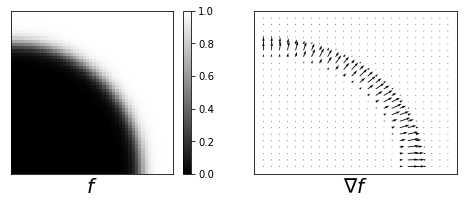

In [117]:
columns = 2
rows = 1
fig = plt.figure(figsize=(8, 3))
sp = fig.add_subplot(rows, columns, 1)

plt.xlabel("$f$", fontsize=20)
i = plt.imshow(classes, cmap="gray", aspect='auto')

fig.colorbar(i, ax=sp)
plt.xticks([])
plt.yticks([])


fig.add_subplot(rows, columns, 2)
plt.xlabel("$\\nabla{f}$", fontsize=20)
plt.quiver(X, Y, FX, FY, width=.004,angles='xy', scale_units='xy', scale=.04)
# plt.imshow(classes, cmap="gray")

plt.xticks([])
plt.yticks([])

plt.show()